Importações

In [13]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, median, mode
import numpy as np
# import squarify
import string
# import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import time

inicio = time.time()

API

In [14]:
def fetch(endpoint):

    url = f"https://jsonplaceholder.typicode.com/{endpoint}"

    try:
        print(f"Acessando api: {url}")
        response = requests.get(url)
        response.raise_for_status() #verifica o código de status HTTP da resposta e levanta uma exceção se houver erro
        print(f"Total de registros: {len(response.json())}")
        return response.json()
    
    except requests.exceptions.RequestException as e:
        print(f"Erro ao acessar a API: {e}")
        return None

Testando a função

In [15]:
comments = fetch("comments")
print(comments[10])

Acessando api: https://jsonplaceholder.typicode.com/comments
Total de registros: 500
{'postId': 3, 'id': 11, 'name': 'fugit labore quia mollitia quas deserunt nostrum sunt', 'email': 'Veronica_Goodwin@timmothy.net', 'body': 'ut dolorum nostrum id quia aut est\nfuga est inventore vel eligendi explicabo quis consectetur\naut occaecati repellat id natus quo est\nut blanditiis quia ut vel ut maiores ea'}


Criando um DataFrame

In [16]:
comments_df = pd.DataFrame(comments)
display(comments_df.head())
print(f"{len(comments_df)} registros devidamente carregados")

,postId,id,name,email,body
0,1,1,id labore ex et quam laborum,Eliseo@gardner.biz,laudantium enim quasi est quidem magnam volupt...
1,1,2,quo vero reiciendis velit similique earum,Jayne_Kuhic@sydney.com,est natus enim nihil est dolore omnis voluptat...
2,1,3,odio adipisci rerum aut animi,Nikita@garfield.biz,quia molestiae reprehenderit quasi aspernatur\...
3,1,4,alias odio sit,Lew@alysha.tv,non et atque\noccaecati deserunt quas accusant...
4,1,5,vero eaque aliquid doloribus et culpa,Hayden@althea.biz,harum non quasi et ratione\ntempore iure ex vo...


500 registros devidamente carregados


Lib statistics

In [17]:
#coluna com o tamanho de cada email
comments_df['tamanho_email'] = comments_df['email'].str.len()

media = comments_df['tamanho_email'].mean()
moda = comments_df['tamanho_email'].mode()[0]
mediana = comments_df['tamanho_email'].median()
desvio = comments_df['tamanho_email'].std()

print(f"Estatísticas sobre o tamanho dos emails dos autores dos comentários:")
print(f"Média: {media:.2f} caracteres")
print(f"Moda: {moda} caracteres")
print(f"Mediana: {mediana} caracteres")
print(f"Desvio padrão: {desvio:.2f} caracteres")


Estatísticas sobre o tamanho dos emails dos autores dos comentários:
Média: 20.70 caracteres
Moda: 17 caracteres
Mediana: 20.0 caracteres
Desvio padrão: 4.38 caracteres


Gráfico de bolhas

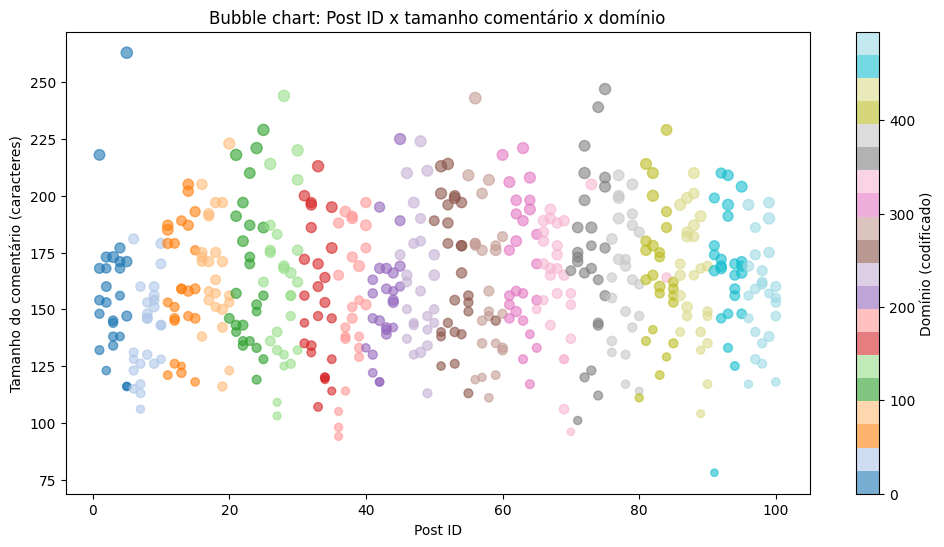

In [18]:
comments_df['numero_caracteres'] = comments_df['body'].apply(len)
comments_df['numero_palavras'] = comments_df['body'].apply(lambda x: len(x.split()))
comments_df['dominio'] = comments_df['email'].apply(lambda x: x.split('@')[1])

# x = postId
# y = tamanho do comentario
# tamanho bolha = palavras
# cor = domínio do email

plt.figure(figsize=(12,6))
scatter = plt.scatter(
    x=comments_df['postId'],
    y=comments_df['numero_caracteres'],
    s=comments_df['numero_palavras']*2, 
    c=pd.factorize(comments_df['dominio'])[0],
    alpha=0.6,
    cmap='tab20'
)
plt.colorbar(scatter, label="Domínio (codificado)")
plt.xlabel("Post ID")
plt.ylabel("Tamanho do comentário (caracteres)")
plt.title("Bubble chart: Post ID x tamanho comentário x domínio")
plt.savefig("bubble_chart.png")
plt.show()

Gráfico de linha acumulativa

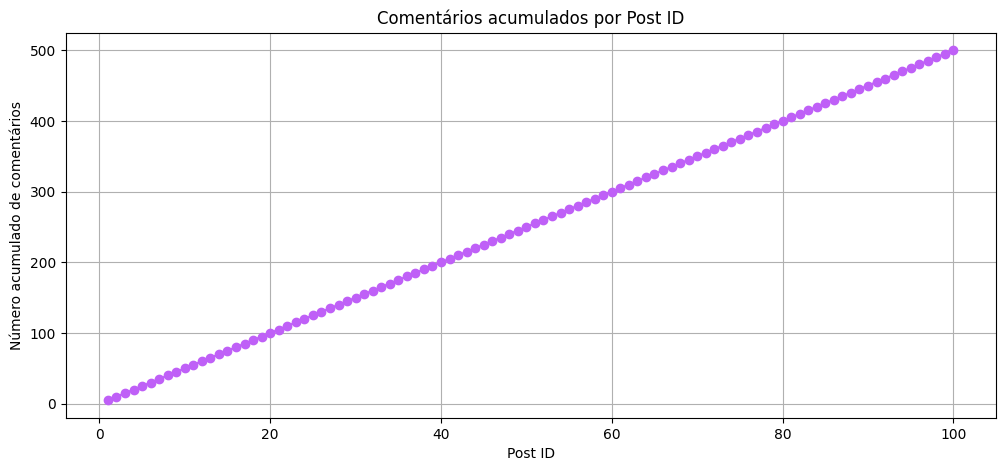

In [19]:
comentarios_por_post = comments_df.groupby('postId').size().sort_index()
comentarios_acumulados = comentarios_por_post.cumsum()

plt.figure(figsize=(12,5))
plt.plot(comentarios_acumulados.index, comentarios_acumulados.values, marker='o', color='#bf60f7')
plt.xlabel("Post ID")
plt.ylabel("Número acumulado de comentários")
plt.title("Comentários acumulados por Post ID")
plt.grid(True)
plt.savefig("comentarios_acumulados_line_chart.png")
plt.show()

Gráfico radical/polar

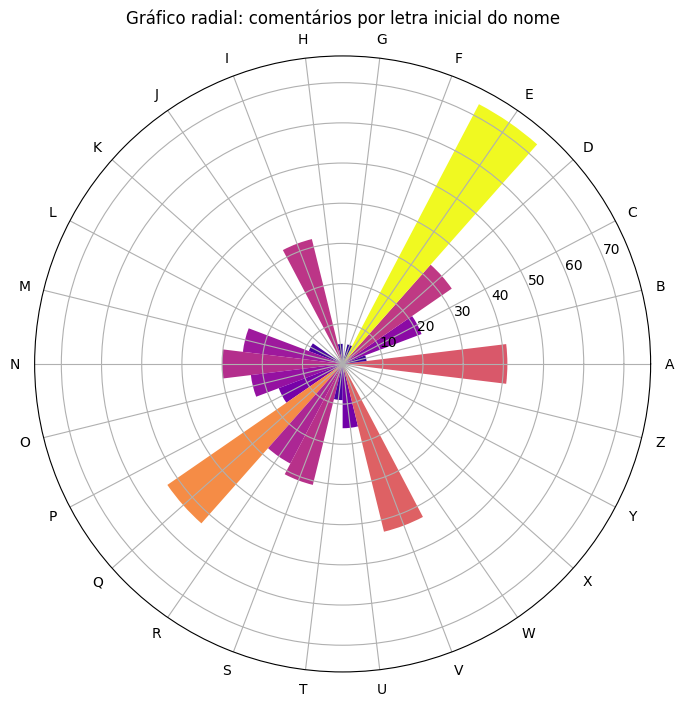

In [20]:
#criando coluna com a primeira letra do nome do autor do comentario
comments_df['primeira_letra'] = comments_df['name'].str[0].str.upper()
contagem_letras = comments_df['primeira_letra'].value_counts().reindex(list(string.ascii_uppercase), fill_value=0)

plt.figure(figsize=(8,8))
theta = np.linspace(0.0, 2 * np.pi, len(contagem_letras), endpoint=False)
radii = contagem_letras.values
width = 2*np.pi / len(contagem_letras)
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0, color=plt.cm.plasma(radii / max(radii)))
ax.set_xticks(theta)
ax.set_xticklabels(contagem_letras.index)
plt.title("Gráfico radial: comentários por letra inicial do nome")
plt.savefig("radial_comments.png")
plt.show()


Gráfico Wordcloud

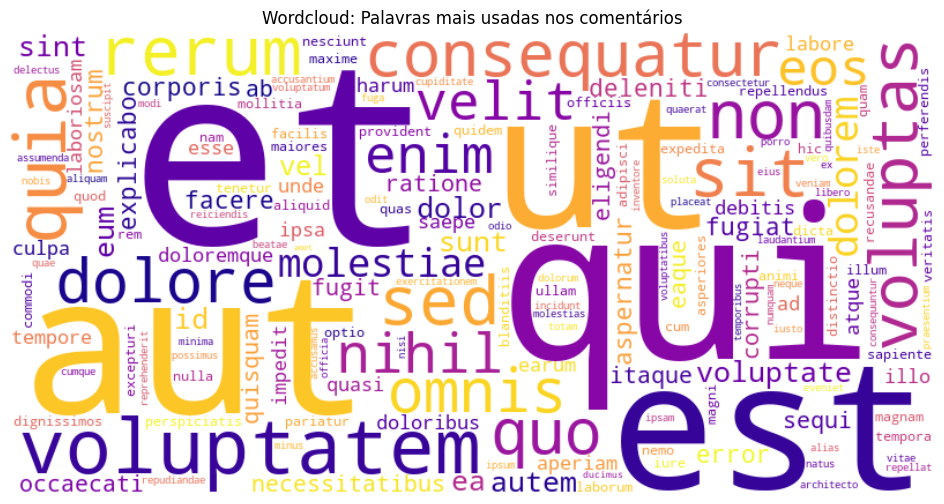

In [21]:


texto = " ".join(comments_df['body'].tolist())
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='plasma').generate(texto)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud: Palavras mais usadas nos comentários")
plt.savefig("wordcloud_comments.png")
plt.show()


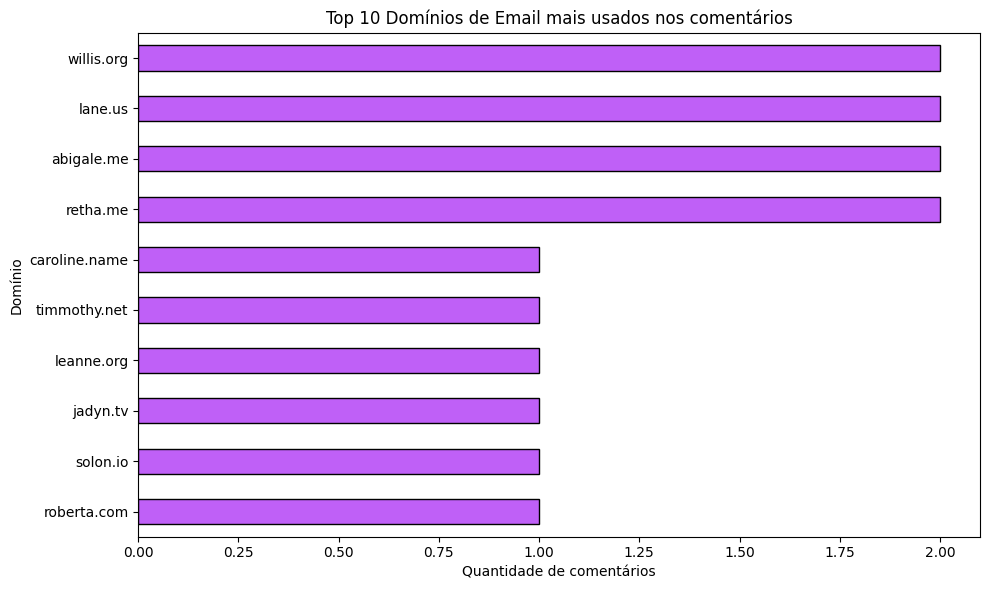

In [22]:
comments_df['dominio'] = comments_df['email'].str.split('@').str[1]
contagem_dominios = comments_df['dominio'].value_counts().head(10)

plt.figure(figsize=(10,6))
contagem_dominios.plot(kind='barh', color="#bf60f7", edgecolor="black")

plt.title("Top 10 Domínios de Email mais usados nos comentários")
plt.xlabel("Quantidade de comentários")
plt.ylabel("Domínio")
plt.gca().invert_yaxis() 

plt.tight_layout()
plt.savefig("top_dominios.png")
plt.show()

Salvar csv

In [23]:
comments_df.to_csv("comments.csv", index=False, encoding="utf-8")
print("Arquivo csv salvo")


Arquivo csv salvo


Tempo de execução

In [24]:
fim = time.time()

duracao = fim - inicio
print(f"O tempo de execução foi de {duracao:.2f} segundos")

O tempo de execução foi de 2.96 segundos
